In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False
from tqdm import tqdm

In [2]:
energy = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [3]:
solar = pd.read_csv('C:\\Users\\user\\github\\Data\\capstone\\weather/solar_power_2204.csv')

In [4]:
solar['datetime'] = pd.to_datetime(solar['datetime'])
solar.target.replace(65535.0, solar.target.mean(), inplace=True)
solar['month'] = solar.datetime.dt.month
solar['hour'] = solar.datetime.dt.hour
solar['year'] = solar.datetime.dt.year
solar['day'] = solar.datetime.dt.day

solar_eda = solar.groupby(['year','month','day','hour']).mean().reset_index()
solar_eda[['year','month','day','hour']] = solar_eda[['year','month','day','hour']].astype('str')
solar_eda['date'] = (solar_eda.year + '-' + solar_eda.month + '-' + solar_eda.day + ' ' + solar_eda.hour + ':00')
solar_eda.date = pd.to_datetime(solar_eda.date)

In [5]:
solar_eda = solar_eda.set_index('date')
solar_eda = solar_eda.fillna(0)

In [6]:
ee = solar.groupby(['hour']).mean().target

ee[:7] = 0
ee[20:] = 0
ee = ee * 2.5

In [7]:
winter_max = [9, 10, 11, 16, 17, 18]
winter_mid = [8, 12, 13, 14, 15, 19, 20, 21]
winter_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

spring_max = [11, 13, 14, 15, 16, 17]
spring_mid = [9, 10, 12, 18, 19, 20, 21]
spring_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

In [8]:
df = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [9]:
df.date_time = pd.to_datetime(df.date_time)

In [10]:
eda_df = df.copy()

eda_df['month'] = 0
eda_df['hour'] = 0
eda_df['year'] = 0
eda_df['day'] = 0
eda_df['요일'] = 0

In [11]:
days = {0: '월요일', 1: '화요일', 2: '수요일', 3: '목요일', 4: '금요일', 5: '토요일', 6: '일요일'}

In [12]:
eda_df['month'] = eda_df.date_time.dt.month
eda_df['hour'] = eda_df.date_time.dt.hour
eda_df['year'] = eda_df.date_time.dt.year
eda_df['day'] = eda_df.date_time.dt.day

In [13]:
eda_df['요일'] = eda_df.date_time.dt.weekday

In [14]:
eda_df = eda_df[eda_df['요일'] < 6]

In [15]:
eda_df['요일'] = eda_df['date_time'].dt.weekday.map(days)

In [16]:
from math import *
import random
import sys

In [17]:
summer_price = [84.8, 84.8, 84.8, 84.8, 84.8,
                84.8, 84.8, 84.8, 137.7, 137.7,
                137.7, 219.8, 137.7, 219.8, 219.8,
                219.8, 219.8, 219.8, 137.7, 137.7,
                137.7, 137.7, 84.8, 84.8]

normal_price = [84.8, 84.8, 84.8, 84.8, 84.8,
                84.8, 84.8, 84.8, 107.3, 107.3,
                107.3, 138, 107.3, 138, 138,
                138, 138, 138, 107.3, 107.3,
                107.3, 107.3, 84.8, 84.8]

winter_price = [91.8, 91.8, 91.8, 91.8, 91.8, 
                91.8, 91.8, 91.8, 137.9, 195.4,
                195.4, 195.4, 137.9, 137.9, 137.9,
                137.9, 195.4, 195.4, 195.4, 137.9,
                137.9, 137.9, 91.8, 91.8]

winter_max = [9, 10, 11, 16, 17, 18]
winter_mid = [8, 12, 13, 14, 15, 19, 20, 21]
winter_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

other_max = [11, 13, 14, 15, 16, 17]
other_mid = [8, 9, 10, 12, 18, 19, 20, 21]
other_min = [0, 1, 2, 3, 4, 5, 6, 7, 22, 23]

price_dict = {"winter": winter_price, "spring": normal_price, "summer": summer_price, "fall": normal_price}

time_dict = {"winter_max": winter_max, "winter_mid": winter_mid, "winter_min": winter_min,
             "spring_max": other_max, "spring_mid": other_mid, "spring_min": other_min}


In [31]:
class Particle:
    def __init__(self, max_iter, initial_position=None):
        if initial_position:  # If an initial position is provided
            self.position = initial_position.copy()
        else:
            self.position = [0.0]*24  # particle current position
        self.velocity = [random.uniform(-1, 1) for _ in range(24)]  # particle current velocity
        self.best_position = [0.0]*24  # particle best position
        self.fitness = sys.maxsize   # particle fitness
        self.best_fitness = sys.maxsize  # particle best fitness
        self.iteration = 0  # iteration count
        self.max_iter = max_iter
        self.history = []

    def evaluate_fitness(self, fitness_func):
        self.fitness = fitness_func(self.position)
        if self.fitness < self.best_fitness:
            self.best_position = self.position.copy()
            self.best_fitness = self.fitness

    def update_velocity(self, global_best_position):
        w_min = 0.5
        w_max = 1
        self.iteration += 1
        w = w_max - ((w_max - w_min) * self.iteration / self.max_iter)
        c1 = 1
        c2 = 1.5
        for i in range(len(self.position)):
            r1 = random.random()
            r2 = random.random()
            cognitive_velocity = c1 * r1 * (self.best_position[i] - self.position[i])
            social_velocity = c2 * r2 * (global_best_position[i] - self.position[i])
            self.velocity[i] = w * self.velocity[i] + cognitive_velocity + social_velocity

    def update_position(self, bounds):
        for i in range(len(self.position)):
            self.position[i] += self.velocity[i]
            if self.position[i] < bounds[i][0]:
                self.position[i] = bounds[i][0]
            elif self.position[i] > bounds[i][1]:
                self.position[i] = bounds[i][1]
        self.history = (self.iteration, self.position.copy(), self.fitness)

class PSO:
    def __init__(self, fitness_function, bounds, num_particles, max_iter, initial_positions=None):
        self.fitness_func = fitness_function
        self.bounds = bounds
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.global_best_position = [0.0]*24
        self.global_best_fitness = sys.maxsize
        self.history = []
        if initial_positions:
            self.swarm = [Particle(max_iter, initial_position=pos) for pos in initial_positions]
        else:
            self.swarm = [Particle(max_iter) for _ in range(num_particles)]

    def run_result(self):
        for i in range(self.max_iter):
            for j in range(self.num_particles):
                self.swarm[j].evaluate_fitness(self.fitness_func)
                if self.swarm[j].fitness < self.global_best_fitness:
                    self.global_best_position = self.swarm[j].position.copy()
                    self.global_best_fitness = self.swarm[j].fitness
            for j in range(self.num_particles):
                self.swarm[j].update_velocity(self.global_best_position)
                self.swarm[j].update_position(self.bounds)
            self.history.append((i, self.global_best_position.copy(), self.global_best_fitness))
        return self.global_best_position, self.global_best_fitness, self.history

def compute_group_mean(data, prices):
    price_groups = {}
    # Group data by prices
    for d, p in zip(data, prices):
        if p not in price_groups:
            price_groups[p] = []
        price_groups[p].append(d)
    # Compute mean for each group
    group_means = {k: np.mean(v) for k, v in price_groups.items()}
    return group_means


def find_peak_group(season_price, power_use):
    # Create a dictionary to map price to hours
    price_to_hours = {}
    for hour, price in enumerate(season_price):
        if price not in price_to_hours:
            price_to_hours[price] = []
        price_to_hours[price].append(hour)
    
    # Identify the group with the highest power use
    max_power = -float('inf')
    peak_group = None
    for price, hours in price_to_hours.items():
        total_power = sum([power_use[hour] for hour in hours])
        if total_power > max_power:
            max_power = total_power
            peak_group = hours

    return peak_group


def fitness_func(position, season, power_generated, power_use):
    total_cost = 0
    cumulative_generated = 0
    cumulative_used = 0
    consumption_pattern = []
    season_price = price_dict[season]
    for i in range(24):
        cumulative_generated += power_generated[i]
        cumulative_used += position[i]
        if cumulative_used > cumulative_generated:  # Cannot use more than generated
            return sys.maxsize
        consumption_pattern.append(power_use[i] - position[i])
        total_cost += (power_use[i] - position[i]) * season_price[i]

        if position[i] > power_use[i] * 0.9 :
            return sys.maxsize
        
    return total_cost

def variance_fitness_func_with_group_mean(position, base_cost, season, power_generated, power_use):
    total_cost = 0
    cumulative_generated = 0
    cumulative_used = 0
    consumption_pattern = []
    season_price = price_dict[season]
    
    for i in range(24):
        cumulative_generated += power_generated[i]
        cumulative_used += position[i]
        
        if cumulative_used > cumulative_generated:
            return sys.maxsize
        
        if position[i] > power_use[i] * 0.9 :
            return sys.maxsize
        
        consumption_pattern.append(power_use[i] - position[i])
        total_cost += (power_use[i] - position[i]) * season_price[i]
    
    if total_cost > base_cost:
        return sys.maxsize
    
    group_means = compute_group_mean(consumption_pattern, season_price)
    peak_group = find_peak_group(season_price, power_use)
    
    weighted_deviation = sum([(consumption_pattern[i] - group_means[season_price[i]])**2 for i in peak_group])

    # peak_weight = 0.8  
    # total_deviation = (peak_weight * weighted_deviation) + (1 - peak_weight) * sum([(consumption_pattern[i] - group_means[season_price[i]])**2 for i in range(24) if i not in peak_group])

    return weighted_deviation

def cal_price_with_variance_optimization_updated(power_generated, power_use, weather):
    bounds = [(0, power_use[i] * 0.9) for i in range(24)]
    initial_positions = [(power_generated*0.2).tolist() if i < 125 else [0]*24 for i in range(250)] 
    pso_price = PSO(lambda x: fitness_func(x, weather, power_generated, power_use), bounds, num_particles = 10, max_iter = 20, initial_positions=initial_positions)
    best_position_price, best_fitness_price, history = pso_price.run_result()
    
    initial_positions_variance = [best_position_price for _ in range(200)]
    pso_variance = PSO(lambda x: variance_fitness_func_with_group_mean(x, best_fitness_price, weather, power_generated, power_use), 
                       bounds, num_particles=10, max_iter=10, initial_positions=initial_positions_variance)
    best_position_variance, _ , his_2 = pso_variance.run_result()
    
    weather_price = {"winter": winter_price, "spring": normal_price, "summer": summer_price, "fall": normal_price}
    best_fitness_price = np.dot(np.array(power_use) - np.array(best_position_variance), weather_price[weather])
    before_price = np.dot(power_use, weather_price[weather])
    before_optimal_price = np.dot(np.array(power_use) - np.array(power_generated), weather_price[weather])

    return best_position_variance, best_fitness_price, before_optimal_price, before_price, history, his_2




In [19]:
using = [1735.22558912, 1692.90378425, 1666.60942472, 1633.57393765,
       1617.61366307, 1648.86508108, 1734.7991391 , 1899.72908325,
       2122.85455022, 2338.61845383, 2510.15136875, 2525.4701233 ,
       2528.12289007, 2533.74891152, 2540.86959113, 2536.0931445 ,
       2521.54245219, 2439.14067532, 2287.51492254, 2184.60913869,
       2063.78559294, 1904.35326784, 1788.63632033, 1780.4262118 ]

solar = [   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,  124.03086265,
        338.65378978,  649.46583908,  934.12122216, 1145.87171128,
       1224.68194677, 1202.18163322, 1069.21578177,  838.69461399,
        512.95469621,  233.04044732,   82.51842252,   39.37393395,
          0.        ,    0.        ,    0.        ,    0.        ]

weather_list = ['spring', 'summer', 'fall', 'winter']
for i in weather_list:
    best_position, best_fitness, before_optimal_price, before_price = cal_price_with_variance_optimization_updated(solar, using, i)

    print(i, best_fitness, before_optimal_price, before_price)

    print('before optimal ',i, np.dot(np.array(using) - np.array(solar), price_dict[i]))
    print('after optimal ', i, np.dot(np.array(using) - np.array(best_position), price_dict[i]))

    print('save money ', i, np.dot(np.array(using) - np.array(solar), price_dict[i]) - np.dot(np.array(using) - np.array(best_position), price_dict[i]))


In [20]:
input = eda_df.drop(['기온(°C)','풍속(m/s)','습도(%)','강수량(mm)','일조(hr)','비전기냉방설비운영','태양광보유','month'], axis=1)

In [21]:
import pvlib

In [22]:
longitude = 128.5647
latitude = 38.2509

In [23]:
weather_dict = {'winter' : '2018-12-01' , 'spring' : '2019-04-01' , 'summer' : '2019-07-01' , 'fall' : '2019-10-01'}

In [24]:
location = pvlib.location.Location(latitude, longitude, tz='Asia/Seoul')

# 일일 일사량을 구합니다.
times = pd.date_range(start=weather_dict['fall'], 
                      end = pd.Timestamp(weather_dict['fall']) + pd.Timedelta(days=1) - pd.Timedelta(hours=1), 
                      freq='1H', tz='Asia/Seoul')
solpos = location.get_solarposition(times=times)
dni_extra = pvlib.irradiance.get_extra_radiation(times)
airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
pressure = pvlib.atmosphere.alt2pres(location.altitude)
am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure) 
tl = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)

# Simplified Solis model을 적용하여 clear sky GHI, DNI, DHI를 얻습니다.
solis_clearsky = pvlib.clearsky.simplified_solis(solpos['apparent_zenith'], am_abs, tl)
cs = location.get_clearsky(times, model='simplified_solis')

# 발전량을 계산합니다.
system = pvlib.pvsystem.PVSystem(surface_tilt=30, surface_azimuth=180,
                                 module_parameters={'pdc0': 5000, 'gamma_pdc': -0.004}, 
                                 inverter_parameters={'pdc0': 5000},
                                 modules_per_string=1, strings_per_inverter=1,
                                 temperature_model_parameters={'a': -3.56, 'b': -0.075, 'deltaT': 3})
mc = pvlib.modelchain.ModelChain(system, location, spectral_model='no_loss', aoi_model='no_loss')

mc.run_model(solis_clearsky)

mc.results.ac

2019-10-01 00:00:00+09:00       0.000000
2019-10-01 01:00:00+09:00       0.000000
2019-10-01 02:00:00+09:00       0.000000
2019-10-01 03:00:00+09:00       0.000000
2019-10-01 04:00:00+09:00       0.000000
2019-10-01 05:00:00+09:00       0.000000
2019-10-01 06:00:00+09:00       0.000000
2019-10-01 07:00:00+09:00       0.000000
2019-10-01 08:00:00+09:00     133.819149
2019-10-01 09:00:00+09:00     557.961084
2019-10-01 10:00:00+09:00     932.394896
2019-10-01 11:00:00+09:00    1142.759519
2019-10-01 12:00:00+09:00    1214.764212
2019-10-01 13:00:00+09:00    1193.541606
2019-10-01 14:00:00+09:00    1061.676176
2019-10-01 15:00:00+09:00     769.047317
2019-10-01 16:00:00+09:00     341.772910
2019-10-01 17:00:00+09:00       6.756225
2019-10-01 18:00:00+09:00       0.000000
2019-10-01 19:00:00+09:00       0.000000
2019-10-01 20:00:00+09:00       0.000000
2019-10-01 21:00:00+09:00       0.000000
2019-10-01 22:00:00+09:00       0.000000
2019-10-01 23:00:00+09:00       0.000000
Freq: H, Name: p

In [25]:
def generation_model(weather, capacity):
    location = pvlib.location.Location(latitude, longitude, tz='Asia/Seoul')

    # 일일 일사량을 구합니다.
    times = pd.date_range(start=weather_dict[weather], 
                        end = pd.Timestamp(weather_dict[weather]) + pd.Timedelta(days=1) - pd.Timedelta(hours=1), 
                        freq='1H', tz='Asia/Seoul')
    solpos = location.get_solarposition(times=times)
    dni_extra = pvlib.irradiance.get_extra_radiation(times)
    airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
    pressure = pvlib.atmosphere.alt2pres(location.altitude)
    am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure) 
    tl = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)

    # Simplified Solis model을 적용하여 clear sky GHI, DNI, DHI를 얻습니다.
    solis_clearsky = pvlib.clearsky.simplified_solis(solpos['apparent_zenith'], am_abs, tl)
    cs = location.get_clearsky(times, model='simplified_solis')

    # 발전량을 계산합니다.
    system = pvlib.pvsystem.PVSystem(surface_tilt=30, surface_azimuth=180,
                                    module_parameters={'pdc0': capacity, 'gamma_pdc': -0.004}, 
                                    inverter_parameters={'pdc0': capacity},
                                    modules_per_string=1, strings_per_inverter=1,
                                    temperature_model_parameters={'a': -3.56, 'b': -0.075, 'deltaT': 3})
    mc = pvlib.modelchain.ModelChain(system, location, spectral_model='no_loss', aoi_model='no_loss')

    mc.run_model(solis_clearsky)

    return mc.results.ac

In [26]:
test_company = [48, 6, 41, 17, 28, 15, 1, 50, 58]

In [27]:
new_position, new_fitness, new_before_optimal_price, new_before_price, _, _ = cal_price_with_variance_optimization_updated(np.array(solar), np.array(using), 'summer')

In [28]:
new_fitness

5449406.538722915

In [29]:
new_before_optimal_price

5686988.893952795

In [32]:
weather_list = ['spring', 'summer', 'fall', 'winter']
results = []  # 결과를 저장할 리스트
solar_none_list = eda_df[eda_df['태양광보유']==0].num.unique()
fitness_result_list = []


for weather in tqdm(weather_list):
    for i in tqdm(range(len(test_company))):
        using = input[input['num']==test_company[i]].groupby(['hour']).mean()['전력사용량(kWh)'].values

        for j in range(1000, 10100, 2000):
            solar = generation_model(weather, j)
            best_position, best_fitness, before_optimal_price, before_price, _, _ = cal_price_with_variance_optimization_updated(solar, using, weather)
            for _ in range(30):
                new_position, new_fitness, new_before_optimal_price, new_before_price, _, _  = cal_price_with_variance_optimization_updated(solar, using, weather)
                fitness_result_list.append((test_company[i], weather, j, new_fitness, new_before_optimal_price))
                if new_fitness < best_fitness:
                    best_position, best_fitness, before_optimal_price, before_price = new_position, new_fitness, new_before_optimal_price, new_before_price
            
            results.append((weather, j, test_company[i], best_position, best_fitness, before_optimal_price, before_price))

df_results = pd.DataFrame(results, columns=['Weather', 'Capacity', 'Company', 'BestPosition', 'BestFitness', 'BeforeOptimalPrice', 'BeforePrice'])


100%|██████████| 4/4 [02:51<00:00, 42.78s/it]


In [ ]:
fitness_df = pd.DataFrame(fitness_result_list, columns=['Company', 'Weather', 'Capacity', 'Fitness', 'before_optimal_price'])

In [ ]:
fitness_df['save_price'] = fitness_df.before_optimal_price - fitness_df.Fitness

In [ ]:
fitness_df['save_price_per'] = fitness_df.save_price / fitness_df.before_optimal_price * 100

(0.0, 15.0)

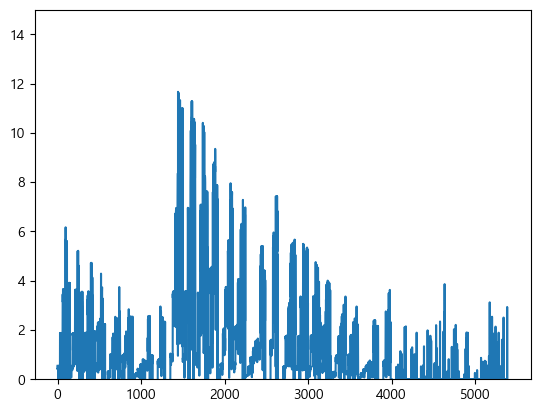

In [ ]:
plt.plot(fitness_df.save_price_per)
plt.ylim(0,15)

In [ ]:
fitness_df[(fitness_df['Company']==58) &(fitness_df['Capacity']==1000)& (fitness_df['Weather']=='spring')].Fitness.std()

1932.5861335905863

In [ ]:
fitness_df[(fitness_df['Company']==58) &(fitness_df['Capacity']==1000)& (fitness_df['Weather']=='spring')].Fitness.mean()

2232102.8072968996

In [ ]:
fitness_df

,Company,Weather,Capacity,Fitness,before_optimal_price,save_price,save_price_per
0,48,spring,1000,3.275760e+06,3.293788e+06,18028.519242,0.547349
1,48,spring,1000,3.276992e+06,3.293788e+06,16796.306683,0.509939
2,48,spring,1000,3.280437e+06,3.293788e+06,13350.975276,0.405338
3,48,spring,1000,3.278736e+06,3.293788e+06,15052.533472,0.456998
4,48,spring,1000,3.280327e+06,3.293788e+06,13461.230937,0.408685
...,...,...,...,...,...,...,...
5395,58,winter,9000,2.197124e+06,2.172261e+06,-24863.505202,-1.144591
5396,58,winter,9000,2.197124e+06,2.172261e+06,-24863.505026,-1.144591
5397,58,winter,9000,2.197048e+06,2.172261e+06,-24787.086027,-1.141073
5398,58,winter,9000,2.197124e+06,2.172261e+06,-24863.505036,-1.144591


In [ ]:
fitness_df

,Company,Weather,Capacity,Fitness,before_optimal_price,save_price,save_price_per
0,48,spring,1000,3.275760e+06,3.293788e+06,18028.519242,0.547349
1,48,spring,1000,3.276992e+06,3.293788e+06,16796.306683,0.509939
2,48,spring,1000,3.280437e+06,3.293788e+06,13350.975276,0.405338
3,48,spring,1000,3.278736e+06,3.293788e+06,15052.533472,0.456998
4,48,spring,1000,3.280327e+06,3.293788e+06,13461.230937,0.408685
...,...,...,...,...,...,...,...
5395,58,winter,9000,2.197124e+06,2.172261e+06,-24863.505202,-1.144591
5396,58,winter,9000,2.197124e+06,2.172261e+06,-24863.505026,-1.144591
5397,58,winter,9000,2.197048e+06,2.172261e+06,-24787.086027,-1.141073
5398,58,winter,9000,2.197124e+06,2.172261e+06,-24863.505036,-1.144591


In [ ]:
fitness_df.groupby(['Company','Weather', 'Capacity']).std()

Fitness  before_optimal_price    save_price  \
Company Weather Capacity                                                     
1       fall    1000       4647.085238                   0.0   4647.085238   
                3000       7269.839037                   0.0   7269.839037   
                5000      15785.495034                   0.0  15785.495034   
                7000      12413.611450                   0.0  12413.611450   
                9000      42164.431480                   0.0  42164.431480   
...                                ...                   ...           ...   
58      winter  1000       3549.197284                   0.0   3549.197284   
                3000      14905.221307                   0.0  14905.221307   
                5000      15941.487242                   0.0  15941.487242   
                7000      31550.196942                   0.0  31550.196942   
                9000      40830.185547                   0.0  40830.185547   

                          save_price_per  
Company Weather Capacity                  
1       fall    1000            0.021621  
                3000            0.034418  
                5000            0.076072  
                7000            0.060912  
                9000            0.210731  
...                                  ...  
58      winter  1000            0.116643  
                3000            0.527588  
                5000            0.611364  
                7000            1.320150  
                9000            1.879617  

[180 rows x 4 columns]

df_results.to_csv('./paper_table_7.csv', encoding='cp949', index=False)

In [ ]:
df_results['optimal_rate'] = (df_results['BeforeOptimalPrice']-df_results['BestFitness'])/df_results['BeforeOptimalPrice']*100

In [ ]:
df_results['save_price'] = df_results['BeforeOptimalPrice'] - df_results['BestFitness']

In [ ]:
spring_df = df_results[df_results['Weather']=='spring']
summer_df = df_results[df_results['Weather']=='summer']
fall_df = df_results[df_results['Weather']=='fall']
winter_df = df_results[df_results['Weather']=='winter']

for i in solar_none_list:
    spring_df[spring_df['Company']==i].plot(x = 'Capacity', y = 'save_price', title = 'spring' + str(i))
    plt.show()
    summer_df[summer_df['Company']==i].plot(x = 'Capacity', y = 'save_price', title = 'summer' + str(i))
    plt.show()
    fall_df[fall_df['Company']==i].plot(x = 'Capacity', y = 'save_price', title = 'fall' + str(i))
    plt.show()
    winter_df[winter_df['Company']==i].plot(x = 'Capacity', y = 'save_price', title = 'winter' + str(i))
    plt.show()

<Axes: xlabel='Capacity'>

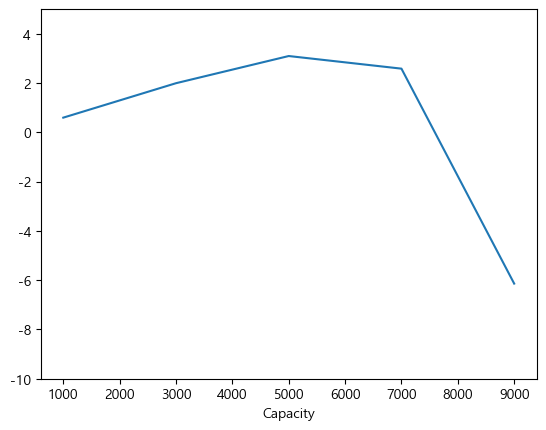

In [ ]:
df_results.groupby(['Capacity']).mean().optimal_rate.plot(ylim=[-10,5])

In [ ]:
df_results.Company.unique()

array([48,  6, 41, 17, 28, 15,  1, 50, 58], dtype=int64)

In [ ]:
print('봄 최적화 결과 (-) ', spring_df[spring_df['optimal_rate']<0].optimal_rate.mean())
print('여름 최적화 결과 (-) ', summer_df[summer_df['optimal_rate']<0].optimal_rate.mean())
print('가을 최적화 결과 (-) ', fall_df[fall_df['optimal_rate']<0].optimal_rate.mean())
print('겨울 최적화 결과 (-) ', winter_df[winter_df['optimal_rate']<0].optimal_rate.mean())

봄 최적화 결과 (-)  -33.488677534339544
여름 최적화 결과 (-)  -20.204176676505547
가을 최적화 결과 (-)  -20.200003549505766
겨울 최적화 결과 (-)  -8.924208505146436e-07


In [ ]:
print('봄 최적화 결과 (+) ', spring_df[spring_df['optimal_rate']>0].optimal_rate.mean())
print('여름 최적화 결과 (+) ', summer_df[summer_df['optimal_rate']>0].optimal_rate.mean())
print('가을 최적화 결과 (+) ', fall_df[fall_df['optimal_rate']>0].optimal_rate.mean())
print('겨울 최적화 결과 (+) ', winter_df[winter_df['optimal_rate']>0].optimal_rate.mean())

봄 최적화 결과 (+)  2.098431426821823
여름 최적화 결과 (+)  4.693903072407486
가을 최적화 결과 (+)  2.264205579713855
겨울 최적화 결과 (+)  1.438587235176541


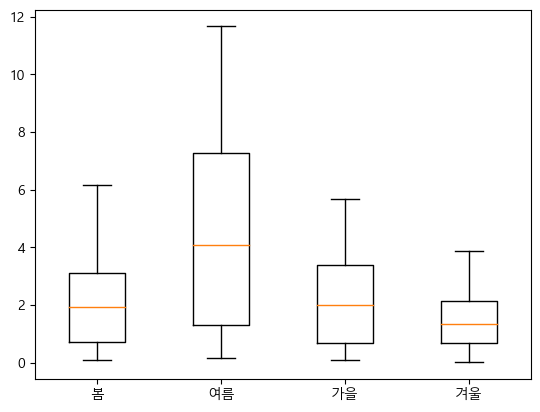

In [ ]:
idx = np.arange(1, 5)
plt.boxplot([spring_df[spring_df['optimal_rate']>0].optimal_rate, 
             summer_df[summer_df['optimal_rate']>0].optimal_rate,
             fall_df[fall_df['optimal_rate']>0].optimal_rate,
             winter_df[winter_df['optimal_rate']>0].optimal_rate])
plt.xticks(idx, labels=['봄', '여름', '가을', '겨울'])
plt.show()

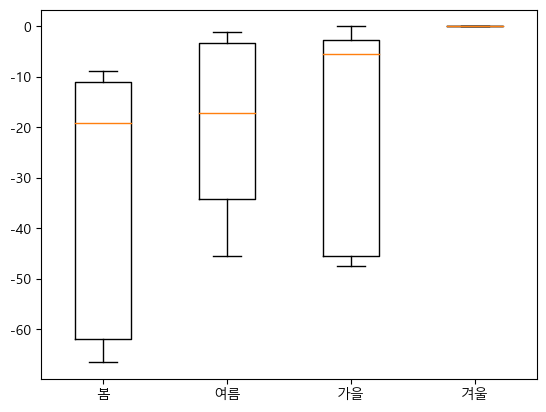

In [ ]:
idx = np.arange(1, 5)
plt.boxplot([spring_df[spring_df['optimal_rate']<0].optimal_rate, 
             summer_df[summer_df['optimal_rate']<0].optimal_rate,
             fall_df[fall_df['optimal_rate']<0].optimal_rate,
             winter_df[winter_df['optimal_rate']<0].optimal_rate])
plt.xticks(idx, labels=['봄', '여름', '가을', '겨울'])
plt.show()

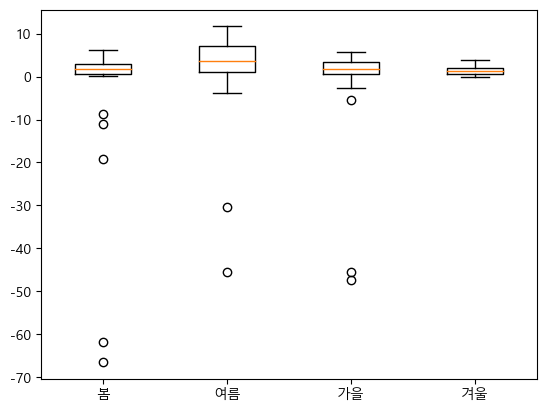

In [ ]:
idx = np.arange(1, 5)
plt.boxplot([spring_df.optimal_rate, 
             summer_df.optimal_rate,
             fall_df.optimal_rate,
             winter_df.optimal_rate])
plt.xticks(idx, labels=['봄', '여름', '가을', '겨울'])
plt.show()

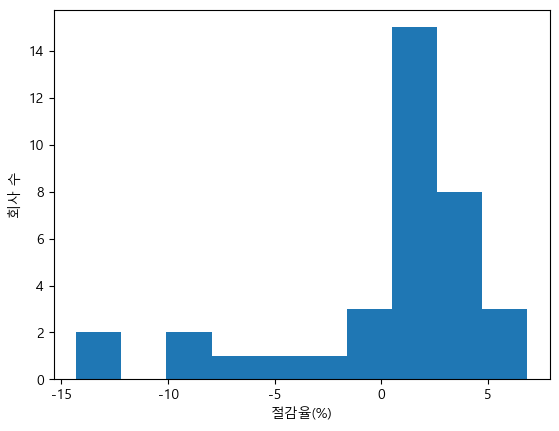

In [ ]:
plt.hist(df_results.groupby(['Company','Weather']).mean()['optimal_rate'])
plt.xlabel('절감율(%)')
plt.ylabel('회사 수')
plt.show()

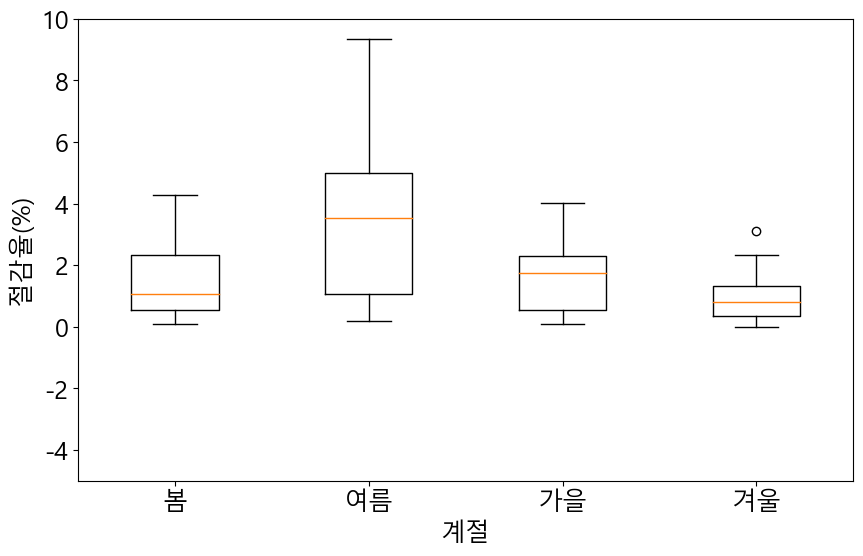

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([
    df_results[(df_results['Capacity'] < 7000) & (df_results['Weather'] == 'spring')].optimal_rate,
    df_results[(df_results['Capacity'] < 7000) & (df_results['Weather'] == 'summer')].optimal_rate,
    df_results[(df_results['Capacity'] < 7000) & (df_results['Weather'] == 'fall')].optimal_rate,
    df_results[(df_results['Capacity'] < 7000) & (df_results['Weather'] == 'winter')].optimal_rate
])
plt.ylim([-5,10])
plt.ylabel('절감율(%)', fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(idx, labels=['봄', '여름', '가을', '겨울'], fontsize = 18)
plt.xlabel('계절', fontsize = 18)
plt.show()

In [ ]:
print(df_results[(df_results['Capacity'] < 7000) & (df_results['Weather'] == 'spring')].optimal_rate.describe())
print('-------------------------------------')
print(df_results[(df_results['Capacity'] < 7000) & (df_results['Weather'] == 'summer')].optimal_rate.describe())
print('-------------------------------------')
print(df_results[(df_results['Capacity'] < 7000) & (df_results['Weather'] == 'fall')].optimal_rate.describe())
print('-------------------------------------')
print(df_results[(df_results['Capacity'] < 7000) & (df_results['Weather'] == 'winter')].optimal_rate.describe())

count    27.000000
mean      1.596168
std       1.227190
min       0.084034
25%       0.549710
50%       1.068218
75%       2.331812
max       4.286977
Name: optimal_rate, dtype: float64
-------------------------------------
count    27.000000
mean      3.384837
std       2.596260
min       0.174168
25%       1.051777
50%       3.534516
75%       4.999556
max       9.350276
Name: optimal_rate, dtype: float64
-------------------------------------
count    27.000000
mean      1.596237
std       1.200180
min       0.081100
25%       0.527466
50%       1.751422
75%       2.295842
max       4.003496
Name: optimal_rate, dtype: float64
-------------------------------------
count    2.700000e+01
mean     1.003183e+00
std      7.925176e-01
min     -6.386427e-07
25%      3.570446e-01
50%      8.159266e-01
75%      1.326533e+00
max      3.122531e+00
Name: optimal_rate, dtype: float64


In [ ]:
df_results

,Weather,Capacity,Company,BestPosition,BestFitness,BeforeOptimalPrice,BeforePrice,optimal_rate,save_price
0,spring,1000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 384.23665604...",3.275746e+06,3.293788e+06,3.501602e+06,0.547785,18042.887032
1,spring,3000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0.05125758541599841, ...",2.824034e+06,2.878160e+06,3.501602e+06,1.880598,54126.635315
2,spring,5000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1222.4065278...",2.372318e+06,2.462532e+06,3.501602e+06,3.663482,90214.435227
3,spring,7000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.7324022084246...",1.920658e+06,2.046904e+06,3.501602e+06,6.167698,126246.881287
4,spring,9000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 534.1346156930605,...",1.567439e+06,1.631276e+06,3.501602e+06,3.913355,63837.642904
...,...,...,...,...,...,...,...,...,...
175,winter,1000,58,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8.4753919351659...",3.034428e+06,3.042799e+06,3.151616e+06,0.275103,8370.840933
176,winter,3000,58,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 142.64267469935...",2.771756e+06,2.825164e+06,3.151616e+06,1.890440,53408.045773
177,winter,5000,58,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 65.75230127718615,...",2.565687e+06,2.607530e+06,3.151616e+06,1.604689,41842.730729
178,winter,7000,58,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 557.84408251364...",2.330023e+06,2.389895e+06,3.151616e+06,2.505208,59871.848394


In [ ]:
df_results.Company.unique()

array([48,  6, 41, 17, 28, 15,  1, 50, 58], dtype=int64)

In [ ]:
df_results_eda = df_results[df_results['Capacity'] < 8000]

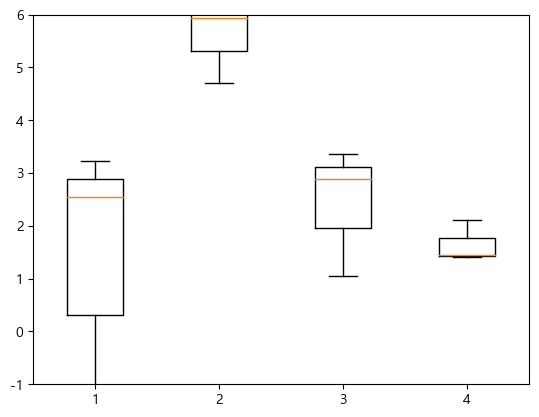

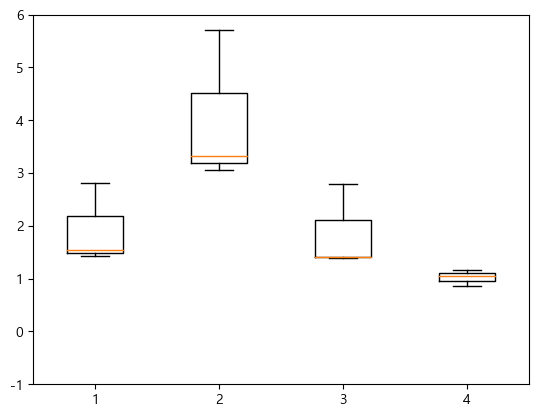

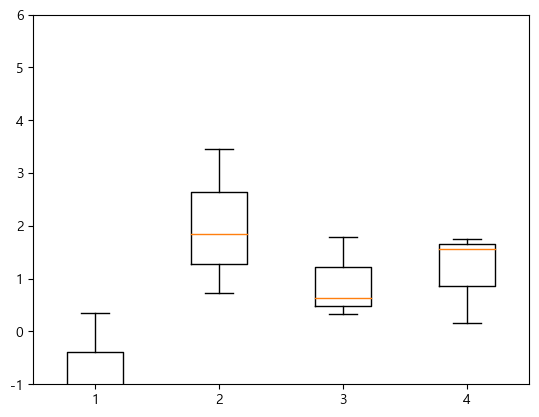

In [ ]:
plt.boxplot([
    df_results[(df_results['Company']==48) | (df_results['Company']==17) | (df_results['Company']==41)].groupby(['Weather','Company']).mean().optimal_rate[3:6],
    df_results[(df_results['Company']==48) | (df_results['Company']==17) | (df_results['Company']==41)].groupby(['Weather','Company']).mean().optimal_rate[6:9],
    df_results[(df_results['Company']==48) | (df_results['Company']==17) | (df_results['Company']==41)].groupby(['Weather','Company']).mean().optimal_rate[:3],
    df_results[(df_results['Company']==48) | (df_results['Company']==17) | (df_results['Company']==41)].groupby(['Weather','Company']).mean().optimal_rate[9:12]])
plt.ylim([-1,6])
plt.show()

plt.boxplot([
    df_results_eda[(df_results_eda['Company']==28) | (df_results_eda['Company']==15) | (df_results_eda['Company']==6)].groupby(['Weather','Company']).mean().optimal_rate[3:6],
    df_results_eda[(df_results_eda['Company']==28) | (df_results_eda['Company']==15) | (df_results_eda['Company']==6)].groupby(['Weather','Company']).mean().optimal_rate[6:9],
    df_results_eda[(df_results['Company']==28) | (df_results_eda['Company']==15) | (df_results_eda['Company']==6)].groupby(['Weather','Company']).mean().optimal_rate[:3],
    df_results_eda[(df_results['Company']==28) | (df_results_eda['Company']==15) | (df_results_eda['Company']==6)].groupby(['Weather','Company']).mean().optimal_rate[9:12]])
plt.ylim([-1,6])
plt.show()

plt.boxplot([
    df_results_eda[(df_results_eda['Company']==1) | (df_results_eda['Company']==50) | (df_results_eda['Company']==58)].groupby(['Weather','Company']).mean().optimal_rate[3:6],
    df_results_eda[(df_results_eda['Company']==1) | (df_results_eda['Company']==50) | (df_results_eda['Company']==58)].groupby(['Weather','Company']).mean().optimal_rate[6:9],
    df_results_eda[(df_results_eda['Company']==1) | (df_results_eda['Company']==50) | (df_results_eda['Company']==58)].groupby(['Weather','Company']).mean().optimal_rate[:3],
    df_results_eda[(df_results_eda['Company']==1) | (df_results_eda['Company']==50) | (df_results_eda['Company']==58)].groupby(['Weather','Company']).mean().optimal_rate[9:12]])
plt.ylim([-1,6])
plt.show()




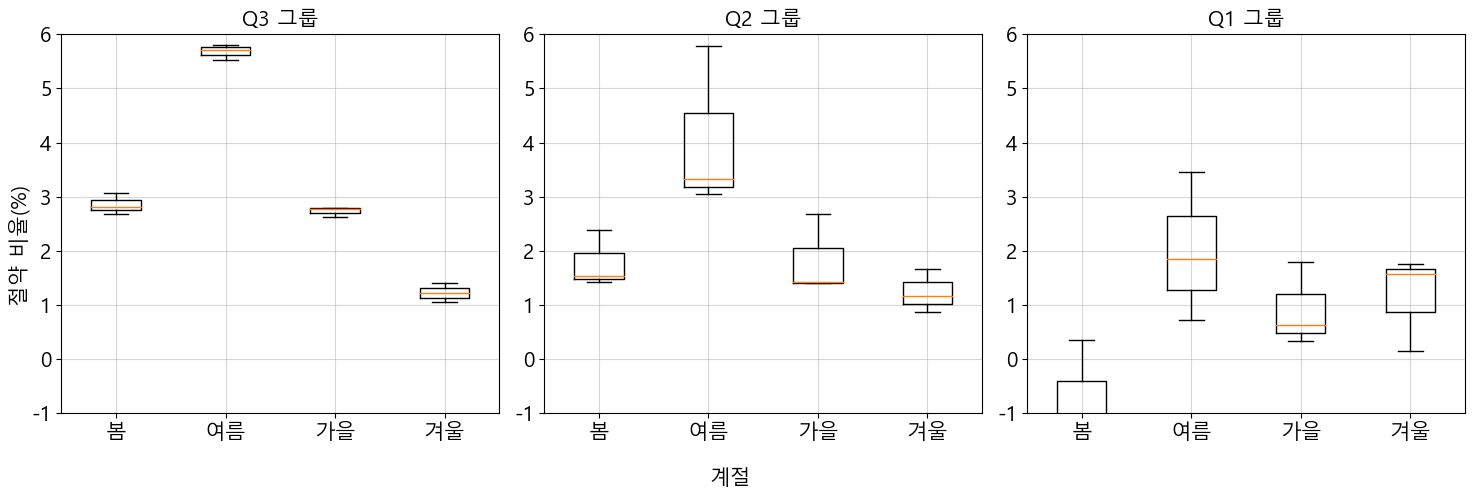

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].boxplot([
    df_results_eda[(df_results_eda['Company']==48) | (df_results_eda['Company']==6) | (df_results_eda['Company']==41)].groupby(['Weather','Company']).mean().optimal_rate[3:6],
    df_results_eda[(df_results_eda['Company']==48) | (df_results_eda['Company']==6) | (df_results_eda['Company']==41)].groupby(['Weather','Company']).mean().optimal_rate[6:9],
    df_results_eda[(df_results_eda['Company']==48) | (df_results_eda['Company']==6) | (df_results_eda['Company']==41)].groupby(['Weather','Company']).mean().optimal_rate[:3],
    df_results_eda[(df_results_eda['Company']==48) | (df_results_eda['Company']==6) | (df_results_eda['Company']==41)].groupby(['Weather','Company']).mean().optimal_rate[9:12]
])
ax[0].set_ylim([-1, 6])
ax[0].set_title('Q3 그룹', fontsize = 15)
ax[0].set_xticks(idx, labels=['봄', '여름', '가을', '겨울'], fontsize = 15)
ax[0].grid(alpha = 0.5)
ax[0].tick_params(axis='y', labelsize = 15)

ax[1].boxplot([
    df_results_eda[(df_results_eda['Company']==28) | (df_results_eda['Company']==15) | (df_results_eda['Company']==17)].groupby(['Weather','Company']).mean().optimal_rate[3:6],
    df_results_eda[(df_results_eda['Company']==28) | (df_results_eda['Company']==15) | (df_results_eda['Company']==17)].groupby(['Weather','Company']).mean().optimal_rate[6:9],
    df_results_eda[(df_results_eda['Company']==28) | (df_results_eda['Company']==15) | (df_results_eda['Company']==17)].groupby(['Weather','Company']).mean().optimal_rate[:3],
    df_results_eda[(df_results_eda['Company']==28) | (df_results_eda['Company']==15) | (df_results_eda['Company']==17)].groupby(['Weather','Company']).mean().optimal_rate[9:12]
])
ax[1].set_ylim([-1, 6])
ax[1].set_title('Q2 그룹', fontsize = 15)
ax[1].set_xticks(idx, labels=['봄', '여름', '가을', '겨울'], fontsize = 15)
ax[1].grid(alpha = 0.5)
ax[1].tick_params(axis='y', labelsize = 15)

ax[2].boxplot([
    df_results_eda[(df_results_eda['Company']==1) | (df_results_eda['Company']==50) | (df_results_eda['Company']==58)].groupby(['Weather','Company']).mean().optimal_rate[3:6],
    df_results_eda[(df_results_eda['Company']==1) | (df_results_eda['Company']==50) | (df_results_eda['Company']==58)].groupby(['Weather','Company']).mean().optimal_rate[6:9],
    df_results_eda[(df_results_eda['Company']==1) | (df_results_eda['Company']==50) | (df_results_eda['Company']==58)].groupby(['Weather','Company']).mean().optimal_rate[:3],
    df_results_eda[(df_results_eda['Company']==1) | (df_results_eda['Company']==50) | (df_results_eda['Company']==58)].groupby(['Weather','Company']).mean().optimal_rate[9:12]
])
ax[2].set_ylim([-1, 6])
ax[2].set_title('Q1 그룹', fontsize = 15)
ax[2].set_xticks(idx, labels=['봄', '여름', '가을', '겨울'], fontsize = 15)
ax[2].grid(alpha = 0.5)
ax[2].tick_params(axis='y', labelsize = 15)

fig.supxlabel('계절', fontsize = 15) 
fig.supylabel('절약 비율(%)', fontsize = 15)

plt.tight_layout()
plt.show()

In [ ]:
df_results_eda[(df_results_eda['Company']==48) | (df_results_eda['Company']==6) | (df_results_eda['Company']==41)].groupby(['Weather','Company']).mean().optimal_rate.mean()

3.12447434304478

In [ ]:
df_results_eda[(df_results_eda['Company']==28) | (df_results_eda['Company']==15) | (df_results_eda['Company']==17)].groupby(['Weather','Company']).mean().optimal_rate.mean()

2.2269976841763475

In [ ]:
df_results_eda[(df_results_eda['Company']==1) | (df_results_eda['Company']==50) | (df_results_eda['Company']==58)].groupby(['Weather','Company']).mean().optimal_rate.mean()

0.850514004207664

In [ ]:
df_results[df_results['Capacity'] < 7000].groupby(['Weather','Company','Capacity']).mean()['optimal_rate'][:18]

Weather  Company  Capacity
fall     1        1000        0.081100
                  3000        0.242890
                  5000        0.417272
         6        1000        0.522758
                  3000        1.764616
                  5000        3.362129
         15       1000        0.316567
                  3000        1.014379
                  5000        1.803375
         17       1000        0.626611
                  3000        2.189483
                  5000        4.003496
         28       1000        0.301987
                  3000        0.977924
                  5000        1.751422
         41       1000        0.529327
                  3000        1.789651
                  5000        3.416712
Name: optimal_rate, dtype: float64

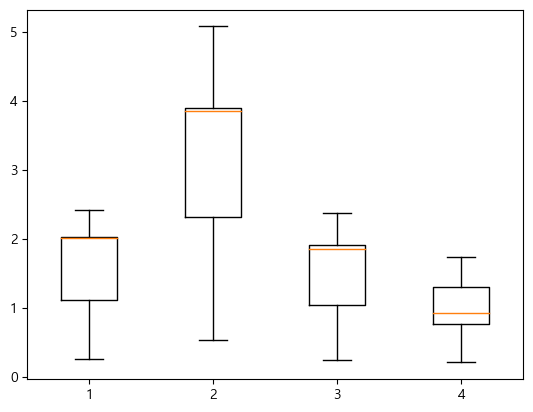

In [ ]:
plt.boxplot([
    df_results[df_results['Capacity'] < 7000].groupby(['Weather','Company']).mean()['optimal_rate'][9:18],
    df_results[df_results['Capacity'] < 7000].groupby(['Weather','Company']).mean()['optimal_rate'][18:27],
    df_results[df_results['Capacity'] < 7000].groupby(['Weather','Company']).mean()['optimal_rate'][:9],
    df_results[df_results['Capacity'] < 7000].groupby(['Weather','Company']).mean()['optimal_rate'][27:36],
])
plt.show()

In [ ]:
df_results.optimal_rate.argmax()

48

In [ ]:
df_results[:49]

,Weather,Capacity,Company,BestPosition,BestFitness,BeforeOptimalPrice,BeforePrice,optimal_rate,save_price
0,spring,1000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 384.23665604...",3.275746e+06,3.293788e+06,3.501602e+06,0.547785,18042.887032
1,spring,3000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0.05125758541599841, ...",2.824034e+06,2.878160e+06,3.501602e+06,1.880598,54126.635315
2,spring,5000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1222.4065278...",2.372318e+06,2.462532e+06,3.501602e+06,3.663482,90214.435227
3,spring,7000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.7324022084246...",1.920658e+06,2.046904e+06,3.501602e+06,6.167698,126246.881287
4,spring,9000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 534.1346156930605,...",1.567439e+06,1.631276e+06,3.501602e+06,3.913355,63837.642904
5,spring,1000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 45.409847055...",3.294136e+06,3.312178e+06,3.519992e+06,0.544744,18042.887046
6,spring,3000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 475.99698416...",2.842424e+06,2.896550e+06,3.519992e+06,1.868638,54126.039032
7,spring,5000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1885.0541917...",2.390708e+06,2.480922e+06,3.519992e+06,3.636326,90214.435260
8,spring,7000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 62.902037766941895...",1.957612e+06,2.065294e+06,3.519992e+06,5.213883,107682.030440
9,spring,9000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1288.9197984156142...",1.591070e+06,1.649666e+06,3.519992e+06,3.551990,58595.990335


In [ ]:
weather_dict['summer']

'2019-07-01'

In [ ]:
pd.Timestamp(weather_dict['fall'])

Timestamp('2019-10-01 00:00:00')

In [ ]:
location = pvlib.location.Location(latitude, longitude, tz='Asia/Seoul')

# 일일 일사량을 구합니다.
times = pd.date_range(start='2019-09-05', 
                      end = pd.Timestamp('2019-09-05') + pd.Timedelta(days=1) - pd.Timedelta(hours=1), 
                      freq='1H', tz='Asia/Seoul')
solpos = location.get_solarposition(times=times)
dni_extra = pvlib.irradiance.get_extra_radiation(times)
airmass = pvlib.atmosphere.get_relative_airmass(solpos['apparent_zenith'])
pressure = pvlib.atmosphere.alt2pres(location.altitude)
am_abs = pvlib.atmosphere.get_absolute_airmass(airmass, pressure) 
tl = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude)

# Simplified Solis model을 적용하여 clear sky GHI, DNI, DHI를 얻습니다.
solis_clearsky = pvlib.clearsky.simplified_solis(solpos['apparent_zenith'], am_abs, tl)
cs = location.get_clearsky(times, model='simplified_solis')

# 발전량을 계산합니다.
system = pvlib.pvsystem.PVSystem(surface_tilt=30, surface_azimuth=180,
                                 module_parameters={'pdc0': 7000, 'gamma_pdc': -0.004}, 
                                 inverter_parameters={'pdc0': 7000},
                                 modules_per_string=1, strings_per_inverter=1,
                                 temperature_model_parameters={'a': -3.56, 'b': -0.075, 'deltaT': 3})
mc = pvlib.modelchain.ModelChain(system, location, spectral_model='no_loss', aoi_model='no_loss')

mc.run_model(solis_clearsky)

mc.results.ac

2019-09-05 00:00:00+09:00       0.000000
2019-09-05 01:00:00+09:00       0.000000
2019-09-05 02:00:00+09:00       0.000000
2019-09-05 03:00:00+09:00       0.000000
2019-09-05 04:00:00+09:00       0.000000
2019-09-05 05:00:00+09:00       0.000000
2019-09-05 06:00:00+09:00       0.000000
2019-09-05 07:00:00+09:00       0.000000
2019-09-05 08:00:00+09:00     334.297326
2019-09-05 09:00:00+09:00     931.366851
2019-09-05 10:00:00+09:00    1385.114286
2019-09-05 11:00:00+09:00    1586.743072
2019-09-05 12:00:00+09:00    1623.649335
2019-09-05 13:00:00+09:00    1622.876036
2019-09-05 14:00:00+09:00    1567.068971
2019-09-05 15:00:00+09:00    1321.960197
2019-09-05 16:00:00+09:00     825.803260
2019-09-05 17:00:00+09:00     235.668883
2019-09-05 18:00:00+09:00       0.000000
2019-09-05 19:00:00+09:00       0.000000
2019-09-05 20:00:00+09:00       0.000000
2019-09-05 21:00:00+09:00       0.000000
2019-09-05 22:00:00+09:00       0.000000
2019-09-05 23:00:00+09:00       0.000000
Freq: H, Name: p

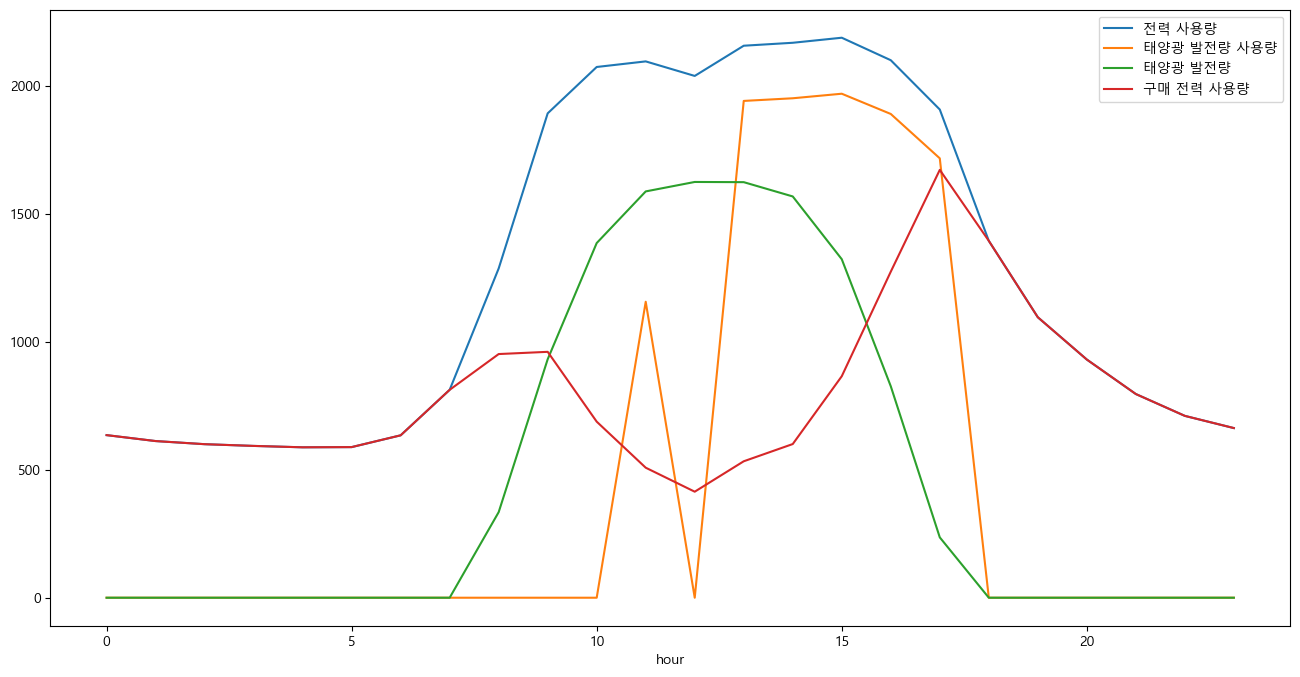

In [ ]:
plt.figure(figsize = (16,8))
input[input['num']==6].groupby(['hour']).mean()['전력사용량(kWh)'].plot()
plt.plot(df_results.loc[53]['BestPosition'])
plt.plot(mc.results.ac.values)
plt.plot(input[input['num']==6].groupby(['hour']).mean()['전력사용량(kWh)'] - mc.results.ac.values)
plt.legend(['전력 사용량', '태양광 발전량 사용량', '태양광 발전량', '구매 전력 사용량'])

plt.show()

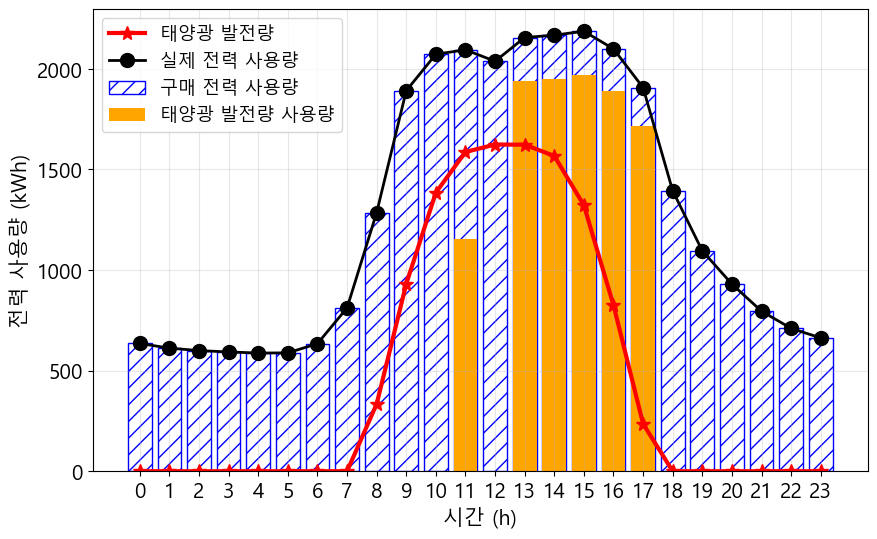

In [ ]:
hours = np.arange(24)
total_power = input[input['num']==6].groupby(['hour']).mean()['전력사용량(kWh)'].values
solar_power = mc.results.ac.values
purchase_power = total_power - solar_power

plt.figure(figsize=(10, 6))
bar1 = plt.bar(hours, total_power, edgecolor='blue', hatch='//', color='white', label='구매 전력 사용량')  # 전체 전력 사용량 막대
bar2 = plt.bar(hours, df_results.loc[53]['BestPosition'],  color = 'orange',label='태양광 발전량 사용량')  
line = plt.plot(solar_power, linewidth = 3, color = 'r', marker = '*',markersize = 10, label = '태양광 발전량')
line2 = plt.plot(total_power, linewidth = 2, color = 'k', marker = 'o', markersize = 10, label = '실제 전력 사용량')

plt.legend(fontsize = 13)
plt.xlabel('시간 (h)', fontsize = 15)
plt.ylabel('전력 사용량 (kWh)', fontsize = 15)
plt.xticks(hours, fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(alpha = 0.3)

plt.show()


In [ ]:
df_results[df_results['Weather']=='summer']

,Weather,Capacity,Company,BestPosition,BestFitness,BeforeOptimalPrice,BeforePrice,optimal_rate,save_price
45,summer,1000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0.05386854826792539, ...",4.568080e+06,4.616281e+06,4.903102e+06,1.044147,48200.742163
46,summer,3000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1742.3527374...",3.897864e+06,4.042639e+06,4.903102e+06,3.581193,144774.704837
47,summer,5000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1819710428322827...",3.227727e+06,3.468997e+06,4.903102e+06,6.955041,241270.151224
48,summer,7000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1930.2502715...",2.557576e+06,2.895355e+06,4.903102e+06,11.666242,337779.097281
49,summer,9000,48,"[0, 0, 0, 0, 0, 0, 0, 0, 423.7062417883213, 0,...",2.066065e+06,2.321713e+06,4.903102e+06,11.011189,255648.183021
50,summer,1000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 1.9379054559324582, 0...",4.566976e+06,4.614352e+06,4.901173e+06,1.026716,47376.286060
51,summer,3000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 752...",3.895938e+06,4.040710e+06,4.901173e+06,3.582832,144771.857192
52,summer,5000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1463.2695196...",3.225768e+06,3.467068e+06,4.901173e+06,6.959776,241300.152699
53,summer,7000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1155.8102136...",2.566947e+06,2.893426e+06,4.901173e+06,11.283467,326478.757087
54,summer,9000,6,"[0, 0, 0, 0, 0, 0, 0, 0, 698.7911630609497, 58...",2.074679e+06,2.319784e+06,4.901173e+06,10.565851,245104.911145


<Axes: xlabel='Company,Weather,Capacity'>

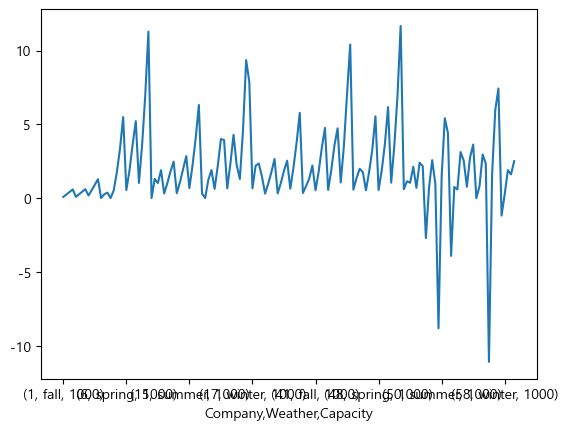

In [ ]:
df_results[df_results['Capacity'] < 8000].groupby(['Company','Weather','Capacity']).mean()['optimal_rate'].plot()